# outFLANK on Thinned data
Perform outFLANK via `R::dartR` on the 10kb thinned kin-removed BFT data.

In [4]:
library("dartR")
library("ggplot2")
library("dplyr")
#setwd("~/Omega/USM PhD/Projects/Active/Blackfin Tuna/Analyses/outlier_analyses/outFLANK")
setwd("C:/Users/pdime/Omega/USM PhD/Projects/Active/Blackfin Tuna/Analyses/thinned/outlier_analysis/outflank")

In [6]:
infile <- "../../data/bft.thinned.gen"
pop_names <- c("BRZ","BRZSP","KEY", "MRT", "PNS", "PR", "SCA", "TX", "VZ")
full_dataset <- import2genind(infile, ncode = 3L, quiet = T)
popNames(full_dataset) <- pop_names
full_dataset

/// GENIND OBJECT /////////

 // 334 individuals; 1,470 loci; 2,940 alleles; size: 4.7 Mb

 // Basic content
   @tab:  334 x 2940 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 2940 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.genepop(file = file, ncode = 3L, quiet = quiet)

 // Optional content
   @pop: population of each individual (group size range: 14-57)

## Run outFLANK

Calculating FSTs, may take a few minutes...


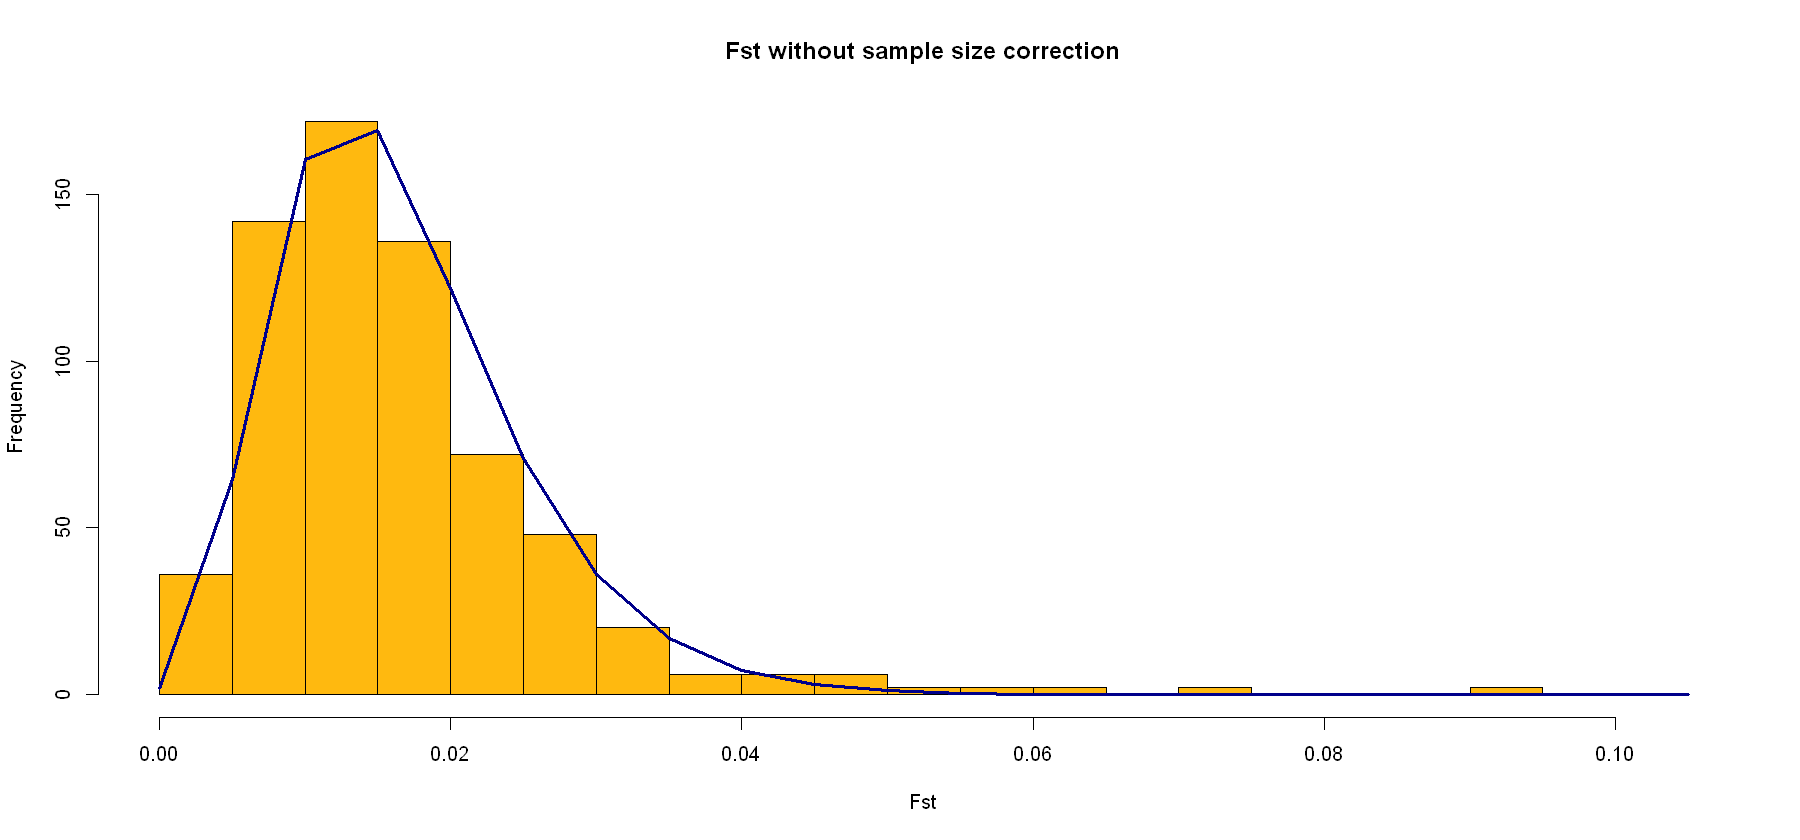

In [7]:
options(repr.plot.width=15, repr.plot.height=7)
full_outflnk <- gl.outflank(
    full_dataset, 
    Hmin= 0.01, 
    qthreshold = 0.05, 
    LeftTrimFraction = 0.05,
    RightTrimFraction = 0.05
)

## Post processing

In [8]:
full_outflnk <- full_outflnk$outflank$results

## Remove duplicated rows for each SNP
toRemove <- seq(1, nrow(full_outflnk), by=2)
full_outflnk <- full_outflnk[-toRemove, ]
head(full_outflnk)

,LocusName,He,FST,T1,T2,FSTNoCorr,T1NoCorr,T2NoCorr,meanAlleleFreq,indexOrder,GoodH,qvalues,pvalues,pvaluesRightTail,OutlierFlag
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
2,232_pilon_2036.001,0.01916753,-0.004781964,-4.590071e-05,0.009598715,0.01494551,0.0001435033,0.009601767,0.9903226,2,goodH,0.9564066,0.9704704,0.4852352,FALSE
4,335_pilon_972.001,0.02402047,-0.003604222,-4.333364e-05,0.012023023,0.01023098,0.0001230337,0.012025603,0.9878419,4,goodH,0.9570394,0.4986088,0.7506956,FALSE
6,341_pilon_1400.002,0.14499328,-0.000383334,-2.783507e-05,0.072613103,0.01469874,0.0010675583,0.072629223,0.9213115,6,goodH,0.9564066,0.9969645,0.4984823,FALSE
8,536_pilon_3491.001,0.03420425,0.009488074,1.627528e-04,0.017153407,0.02609587,0.0004477339,0.017157269,0.9825949,8,goodH,0.7691229,0.2059966,0.1029983,FALSE
10,794_pilon_11572.002,0.03748631,-0.002508902,-4.708385e-05,0.018766714,0.01187027,0.0002228194,0.018771213,0.9808917,10,goodH,0.9564066,0.6840036,0.6579982,FALSE
12,1009_pilon_1199.002,0.02394858,0.003266072,3.919828e-05,0.012001659,0.02038010,0.0002446598,0.012004838,0.9878788,12,goodH,0.9359435,0.4896557,0.2448278,FALSE


Find which markers are putative outliers

In [9]:
out_index <- which(full_outflnk$OutlierFlag==TRUE)
outflank_names <- locNames(full_dataset)[out_index]
length(outflank_names)
head(outflank_names)

[1] 36

[1] "5074_pilon_114485" "12568_pilon_338"   "24029_pilon_1017" 
[4] "35537_pilon_10279" "37649_pilon_9024"  "38501_pilon_4358"

In [14]:
write.csv(full_outflnk, file = "outflank.thinned.csv", row.names = FALSE)
write.table(outflank_names, file = "outflank.outliers.loci", row.names = F, col.names = F, quote = F)

## Plots

In [11]:
mycolors <- c("#bbbbbb", "#4095b5", "#8a556e", "#f4cf30")

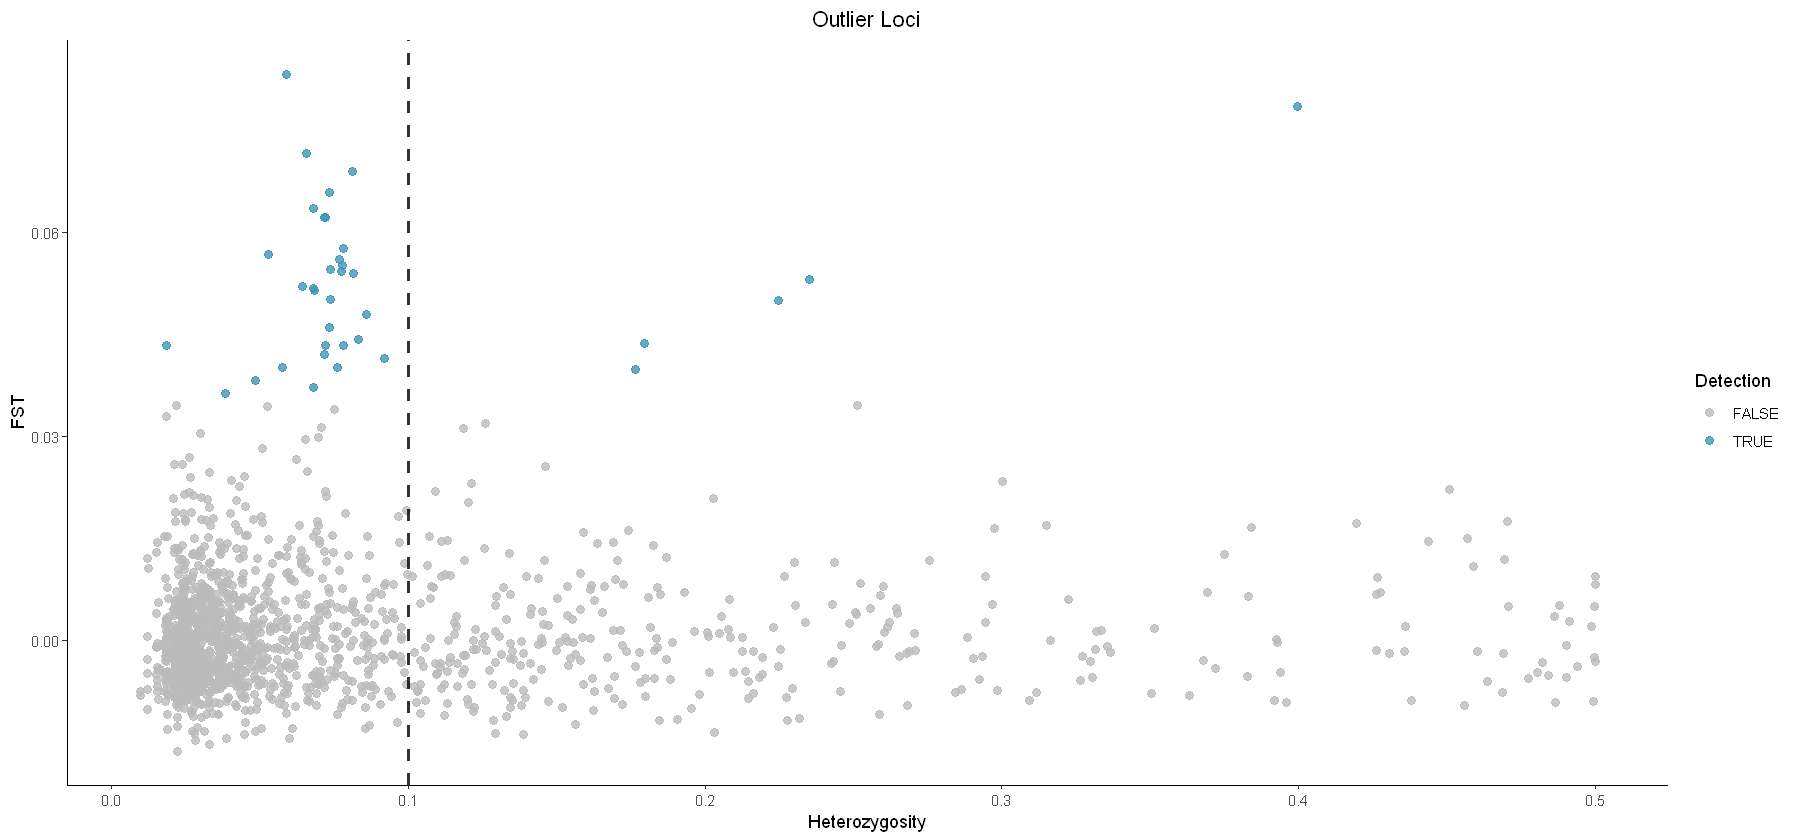

In [12]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data = full_outflnk, x = He, y = FST) + 
  theme_classic() +
  geom_point(aes(x = He, y = FST, col = OutlierFlag), alpha = 0.8,  size = 2.1) + 
  geom_vline(xintercept = 0.1, alpha = 0.8, linetype = "dashed", size = 1) +
  labs(x = "Heterozygosity", y = "FST", color = "Detection") +
  scale_color_manual(values = mycolors[1:2]) +
  ggtitle("Outlier Loci") +
  theme(plot.title = element_text(hjust = 0.5))